In [2]:


# Load the data
import pandas as pd

# Specify the path to your CSV file
csv_path = '/content/rfm_data.csv'

# Load the data
df = pd.read_csv(csv_path)

# Display the first few rows
print(df.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [4]:

# Check data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB
None


In [5]:

# Summary statistics
print(df.describe())


        CustomerID  TransactionAmount        OrderID
count  1000.000000         1000.00000    1000.000000
mean   5554.789000          513.67781  554071.398000
std    2605.014863          286.09870  264695.448814
min    1011.000000           12.13000  100096.000000
25%    3273.000000          257.12000  313152.000000
50%    5538.000000          523.56500  564671.500000
75%    7821.750000          759.86000  783052.250000
max    9991.000000          999.44000  999695.000000


In [6]:

# Convert 'PurchaseDate' to datetime format
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])


#Data Cleaning and Preprocessing

In [17]:
# Drop duplicate values in the 'Frequency' column and create a copy
df = df.drop_duplicates(subset=['CustomerID', 'Frequency']).copy()


In [23]:
# Check for missing or null values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
Recency               0
Frequency             0
Monetary              0
Recency_Quartile      0
dtype: int64


In [24]:

# Convert "PurchaseDate" to datetime format
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Remove irrelevant or redundant columns
df = df.drop(columns=['OrderID'])  # Adjust if needed, only if OrderID is not needed for analysis


# RFM Analysis

In [25]:
# Calculate Recency, Frequency, and Monetary values based on your business context
import datetime as dt

# Assume the analysis date is the maximum date in the dataset
analysis_date = df['PurchaseDate'].max()


In [26]:

# Calculate Recency
df['Recency'] = (analysis_date - df['PurchaseDate']).dt.days


In [27]:

# Calculate Frequency
frequency_df = df.groupby('CustomerID')['PurchaseDate'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
df = pd.merge(df, frequency_df, on='CustomerID', how='left')


In [28]:

# Calculate Monetary
monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']
df = pd.merge(df, monetary_df, on='CustomerID', how='left')


In [35]:
# Calculate Monetary for each customer
df['Monetary'] = df.groupby('CustomerID')['TransactionAmount'].transform('sum')

# Calculate RFM Score directly without quartiles for Recency and Monetary
df['RFM_Score'] = pd.qcut(df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=[4, 3, 2, 1])

# Display the resulting DataFrame with RFM Score
print(df[['CustomerID', 'Monetary', 'RFM_Score']])


     CustomerID  Monetary RFM_Score
0          8814    943.31         1
1          2188    463.70         3
2          4608     80.28         4
3          2559    221.29         4
4          9482    739.56         2
..          ...       ...       ...
941        2970    759.62         1
942        6669    941.50         1
943        8836    545.36         2
944        1440    729.94         2
945        4759    804.28         1

[946 rows x 3 columns]


# Customer Segmentation

In [36]:
# Define customer segments based on RFM scores
def segment_customers(row):
    if row['RFM_Score'] in ['44', '43', '34', '33']:
        return 'High-Value'
    elif row['RFM_Score'] in ['24', '23']:
        return 'Loyal'
    elif row['RFM_Score'] in ['14', '13']:
        return 'At-Risk'
    else:
        return 'Other'



In [37]:

# Apply segmentation function to create a new 'Segment' column
df['Segment'] = df.apply(segment_customers, axis=1)


In [38]:

# Analyze the distribution of customers across different segments
segment_distribution = df['Segment'].value_counts()

# Display the distribution of customers across segments
print("Customer Segmentation:")
print(segment_distribution)

Customer Segmentation:
Other    946
Name: Segment, dtype: int64


#Visualization

Text(0, 0.5, 'Frequency')

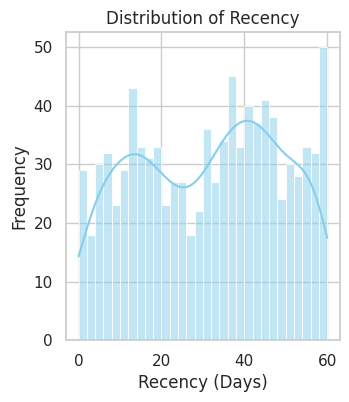

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Visualize the distribution of Recency
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Recency'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')


KeyError: ignored

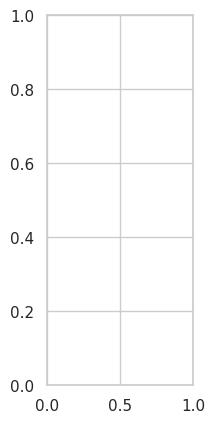

In [40]:

# Visualize the distribution of Frequency
plt.subplot(1, 3, 2)
sns.histplot(df['Frequency'], bins=30, color='lightcoral', kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')


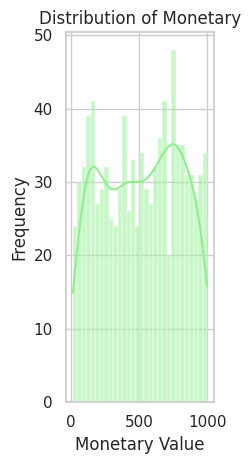

In [41]:

# Visualize the distribution of Monetary
plt.subplot(1, 3, 3)
sns.histplot(df['Monetary'], bins=30, color='lightgreen', kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


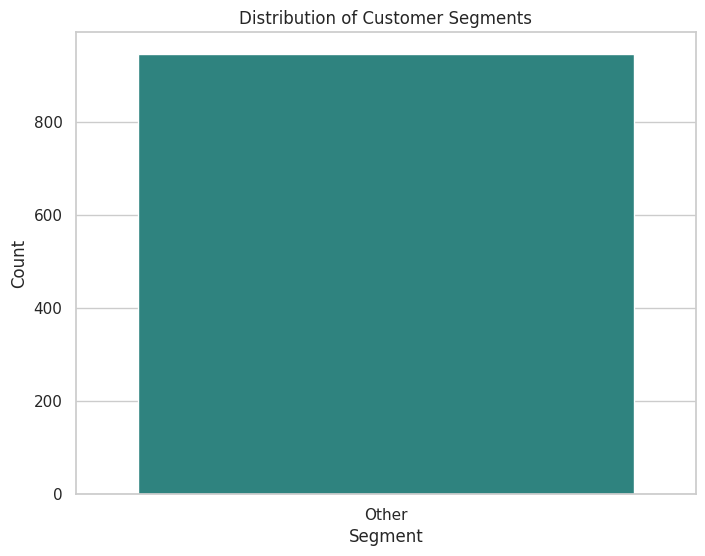

In [42]:

# Visualize the distribution of customer segments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index, palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


In [44]:
import plotly.express as px
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Recency, Frequency, and Monetary values based on your business context
import datetime as dt

# Assume the analysis date is the maximum date in the dataset
analysis_date = df['PurchaseDate'].max()

# Calculate Recency
df['Recency'] = (analysis_date - df['PurchaseDate']).dt.days

# Calculate Frequency (count of transactions per customer)
df['Frequency'] = df.groupby('CustomerID')['PurchaseDate'].transform('nunique')


In [46]:
#Calculate Monetary
df['Monetary'] = df.groupby('CustomerID')['TransactionAmount'].transform('sum')


In [47]:

# Trellis Chart
trellis_chart = px.scatter(df, x='Recency', y='Monetary', color='Frequency', facet_col='Segment',
                           labels={'Recency': 'Recency (Days)', 'Monetary': 'Monetary Value'})
trellis_chart.update_layout(title='Trellis Chart')
trellis_chart.show()


In [48]:

# Area Chart
area_chart = px.area(df, x='Recency', y='Monetary', color='Segment', line_group='CustomerID',
                     labels={'Recency': 'Recency (Days)', 'Monetary': 'Monetary Value'})
area_chart.update_layout(title='Area Chart')
area_chart.show()

# K-Means Clustering Plot
# Assume k=4 clusters based on the quartiles
kmeans_data = df[['Recency', 'Frequency', 'Monetary']]
kmeans_model = KMeans(n_clusters=4, random_state=42).fit(kmeans_data)
df['Cluster'] = kmeans_model.labels_

kmeans_plot = px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary', color='Cluster',
                            labels={'Recency': 'Recency (Days)', 'Frequency': 'Frequency', 'Monetary': 'Monetary Value'})
kmeans_plot.update_layout(title='K-Means Clustering Plot')
kmeans_plot.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



TypeError: ignored

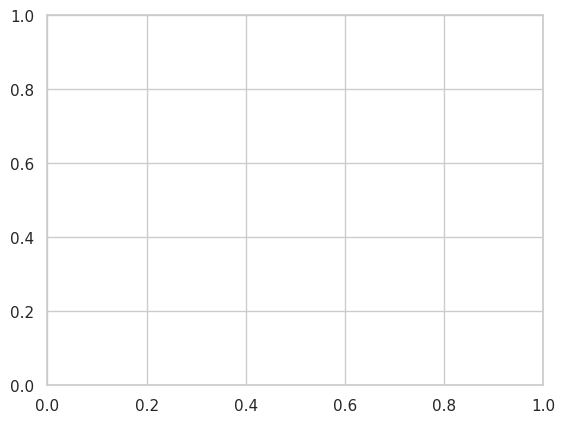

In [50]:

# Parallel Coordinates Plot
parallel_coordinates_plot = parallel_coordinates(df, class_column='Segment', color=['blue', 'orange', 'green', 'red'])
parallel_coordinates_plot.update_layout(title='Parallel Coordinates Plot')
parallel_coordinates_plot.show()


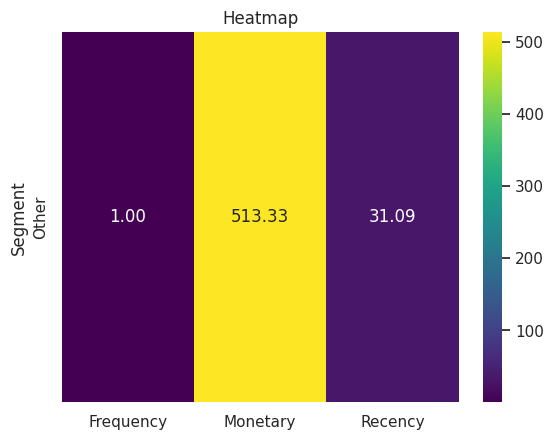

In [51]:

# Heatmap
heatmap_data = df.pivot_table(index='Segment', values=['Recency', 'Frequency', 'Monetary'], aggfunc='mean')
heatmap_plot = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f')
heatmap_plot.set_title('Heatmap')
plt.show()

In [52]:
import calendar
import numpy as np
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame
# Assuming 'PurchaseDate' is in datetime format
df['PurchaseDay'] = df['PurchaseDate'].dt.date

In [53]:

# Count the number of transactions per day
calendar_data = df.groupby('PurchaseDay').size().reset_index(name='TransactionCount')

# Create a calendar visualization
calendar_data['Day'] = calendar_data['PurchaseDay'].apply(lambda x: x.day)
calendar_data['Month'] = calendar_data['PurchaseDay'].apply(lambda x: x.month)
calendar_data['Year'] = calendar_data['PurchaseDay'].apply(lambda x: x.year)


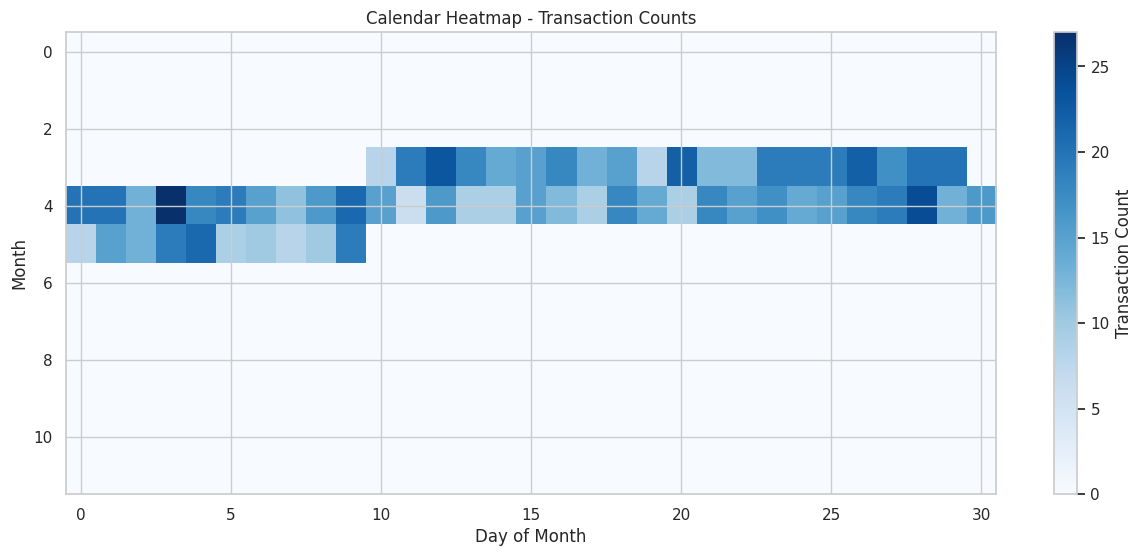

In [54]:

# Create an empty calendar grid
calendar_grid = np.zeros((calendar_data['Year'].nunique(), 12, 31))

# Fill in the calendar grid with transaction counts
for index, row in calendar_data.iterrows():
    calendar_grid[row['Year'] - calendar_data['Year'].min(), row['Month'] - 1, row['Day'] - 1] = row['TransactionCount']

# Plot the calendar heatmap
plt.figure(figsize=(15, 6))
plt.imshow(calendar_grid.sum(axis=0), cmap='Blues', interpolation='nearest', aspect='auto')
plt.title('Calendar Heatmap - Transaction Counts')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.colorbar(label='Transaction Count')
plt.show()

# Descriptive Statistics

Descriptive Statistics for TransactionAmount:
count    946.000000
mean     513.326152
std      285.632343
min       12.130000
25%      256.560000
50%      523.565000
75%      759.520000
max      999.440000
Name: TransactionAmount, dtype: float64


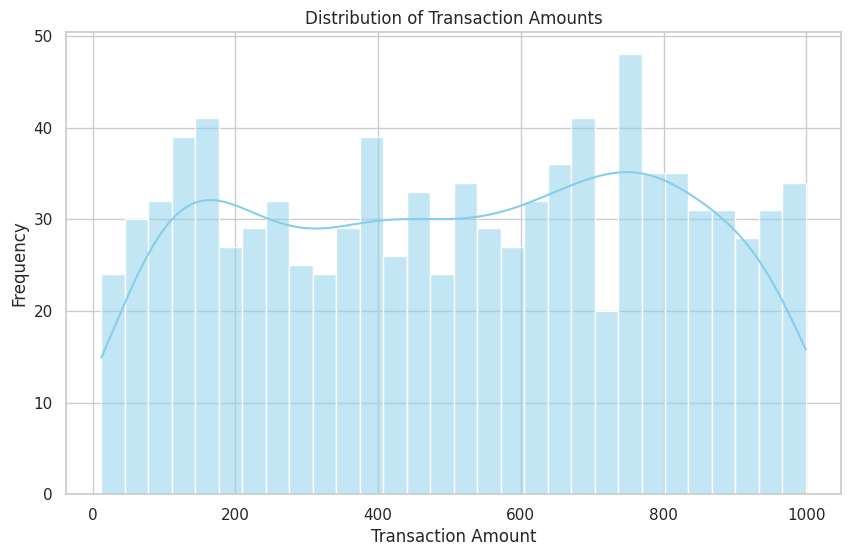

In [55]:
 #Calculate descriptive statistics
transaction_stats = df['TransactionAmount'].describe()

# Print descriptive statistics
print("Descriptive Statistics for TransactionAmount:")
print(transaction_stats)

# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#
# Location Analysis:

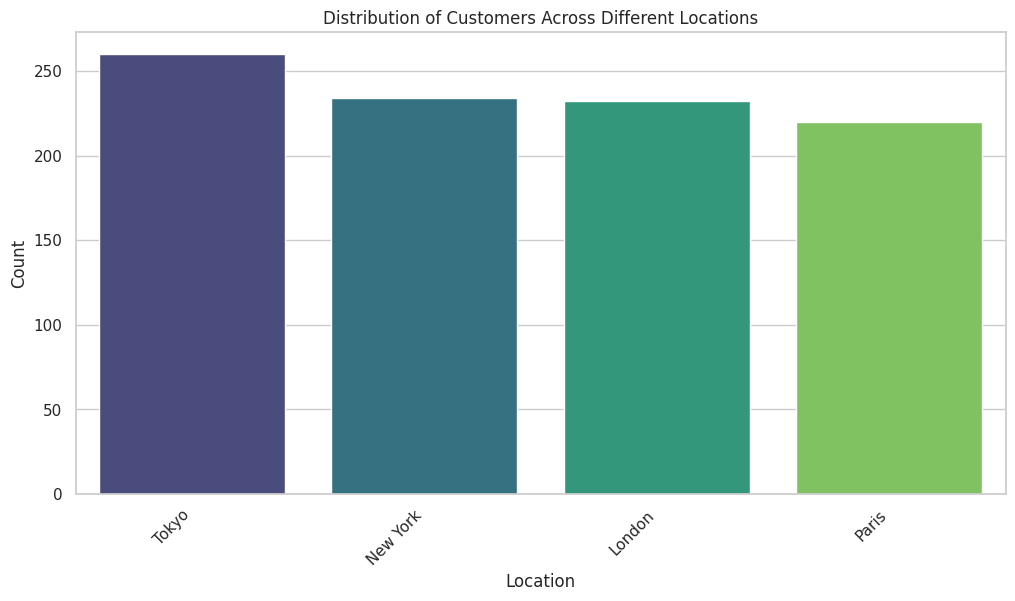

In [56]:

import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Assuming df is your DataFrame
# Load your data (replace 'your_file_path' with the actual path)
# df = pd.read_csv('your_file_path')

# Bar chart for location distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index, palette='viridis')
plt.title('Distribution of Customers Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



In [60]:

# Analyze the "ProductInformation" column
# Count the occurrences of each product
product_counts = df['ProductInformation'].value_counts()

# Calculate average transaction amount per product
avg_transaction_per_product = df.groupby('ProductInformation')['TransactionAmount'].mean()

# Find the most purchased product
most_purchased_product = product_counts.idxmax()

# Print the results
print("Product Counts:")
print(product_counts)

print("\nAverage Transaction Amount per Product:")
print(avg_transaction_per_product)

print("\nMost Purchased Product:", most_purchased_product)


Product Counts:
Product C    259
Product D    241
Product B    228
Product A    218
Name: ProductInformation, dtype: int64

Average Transaction Amount per Product:
ProductInformation
Product A    523.042339
Product B    503.938947
Product C    523.928533
Product D    502.023817
Name: TransactionAmount, dtype: float64

Most Purchased Product: Product C


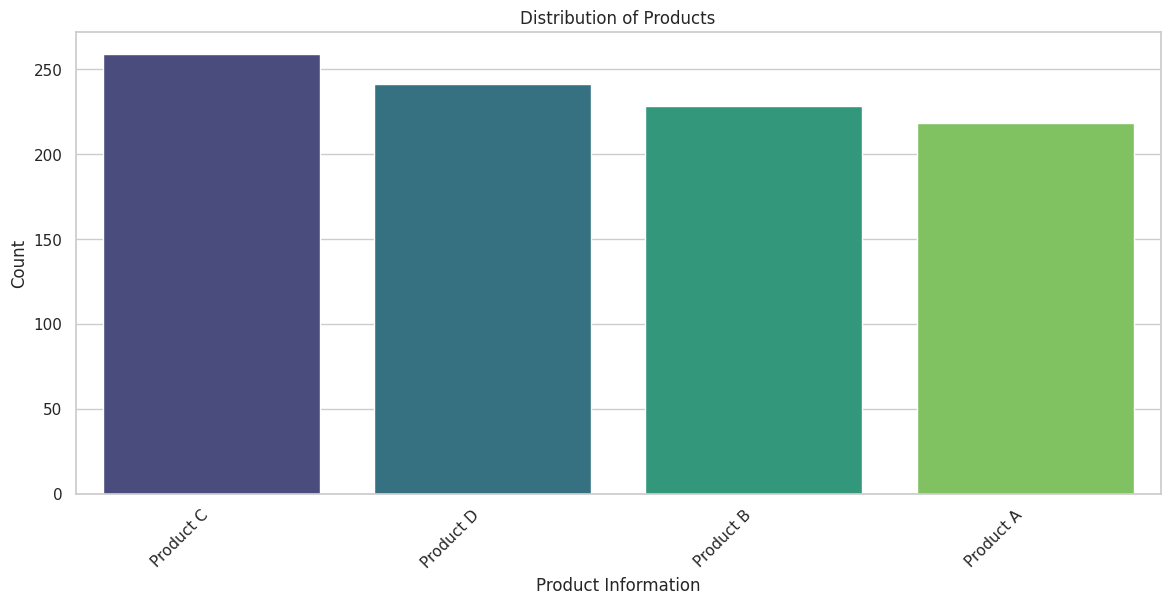

In [61]:

# Visualize the distribution of products
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='ProductInformation', order=df['ProductInformation'].value_counts().index, palette='viridis')
plt.title('Distribution of Products')
plt.xlabel('Product Information')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Time-Series Analysis

In [73]:

# Assuming you have columns like 'PurchaseDate' and 'TransactionAmount'
# If the column names are different, replace them accordingly
date_column = 'PurchaseDate'
amount_column = 'TransactionAmount'

In [77]:

# Resample the data to get the monthly frequency
monthly_purchase = df[amount_column].resample('M').sum()


Text(0.5, 1.0, 'Monthly Total Transaction Amount (Pie Chart)')

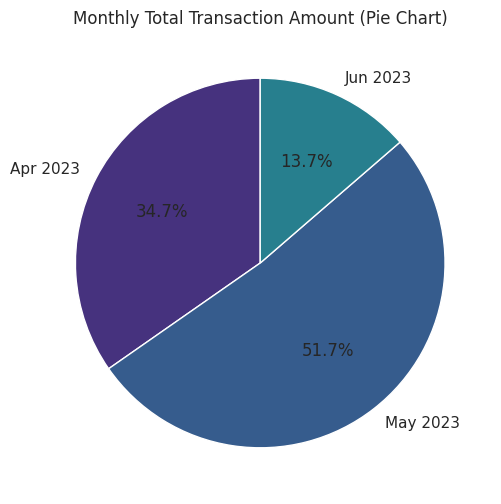

In [78]:

# Plotting the pie chart
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(monthly_purchase, labels=monthly_purchase.index.strftime('%b %Y'), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Monthly Total Transaction Amount (Pie Chart)')


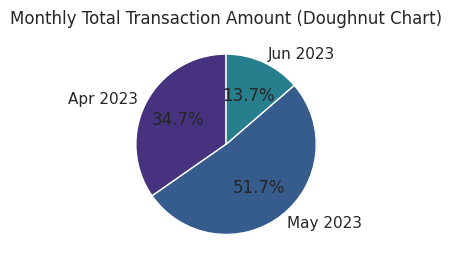

In [79]:

# Plotting the doughnut chart
plt.subplot(1, 2, 2)
plt.pie([1], colors='white', radius=0.6)  # Create a white circle to make it a doughnut chart
plt.pie(monthly_purchase, labels=monthly_purchase.index.strftime('%b %Y'), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Monthly Total Transaction Amount (Doughnut Chart)')

plt.show()


In [87]:

# Check for missing values in relevant columns
if 'TransactionAmount' not in df.columns or 'PurchaseDate' not in df.columns:
    print("Error: Missing columns - 'TransactionAmount' or 'PurchaseDate'.")
else:
    # Calculate average purchase value
    average_purchase_value = df['TransactionAmount'].mean()

    # Calculate purchase frequency
    purchase_frequency = df.groupby('CustomerID').size().mean()

    # Calculate customer lifespan (assuming time between the first and last purchase)
    customer_lifespan = (df.groupby('CustomerID').apply(lambda x: x['PurchaseDate'].max() - x['PurchaseDate'].min()).mean()).days

    # Calculate CLV without retention rate
    clv = average_purchase_value * purchase_frequency * customer_lifespan

    print(f"Customer Lifetime Value (CLV): ${clv:.2f}")

Error: Missing columns - 'TransactionAmount' or 'PurchaseDate'.


#Correlation Analysis:

In [88]:
# Assuming df is your DataFrame with 'Recency', 'Frequency', and 'Monetary' columns
correlation_matrix = df[['Recency', 'Frequency', 'Monetary']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Recency  Frequency  Monetary
Recency    1.000000        NaN -0.002295
Frequency       NaN        NaN       NaN
Monetary  -0.002295        NaN  1.000000
